## Import libraries

In [45]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_csv("/Users/tony/Desktop/Career Foundry/Achievement 6/Superstore_cleaned.csv", encoding='latin1')

In [47]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Wrangling

In [63]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the Quarter from 'Order Date' and create the 'Quarter' column
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Group by quarter and aggregate 'Sales' by summing them up
df_aggregated = df.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()

# Convert the 'Quarter' column back to datetime format
df_aggregated['Quarter'] = df_aggregated['Quarter'].dt.to_timestamp()

# Set 'Quarter' as the index
df_aggregated.set_index('Quarter', inplace=True)

# Display the DataFrame
df_aggregated.head(10)

,Sales
Quarter,
2014-01-01,74447.7960
2014-04-01,86538.7596
2014-07-01,143633.2123
2014-10-01,179627.7302
2015-01-01,68851.7386
2015-04-01,89124.1870
2015-07-01,130259.5752
2015-10-01,182297.0082
2016-01-01,93237.1810


Aggregated the sales quarterly for analysis

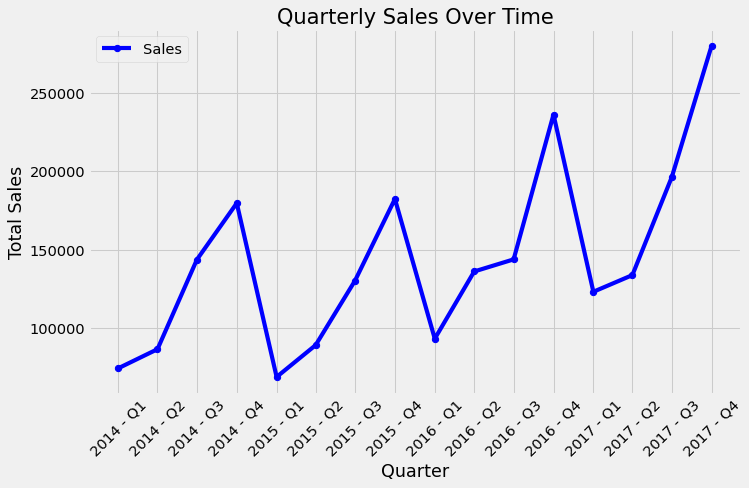

In [60]:
# Create a line chart of the sales data over time
plt.figure(figsize=(10,6), dpi=75)
plt.plot(df_aggregated.index, df_aggregated['Sales'], marker='o', linestyle='-', color='b', label='Sales')

# Set the title and labels
plt.title('Quarterly Sales Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

# Set the x-ticks to display the quarter information in the format 'Year - Qx'
plt.xticks(df_aggregated.index, [f"{x.year} - Q{x.quarter}" for x in df_aggregated.index], rotation=45)

# Add a grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


## Decomposition

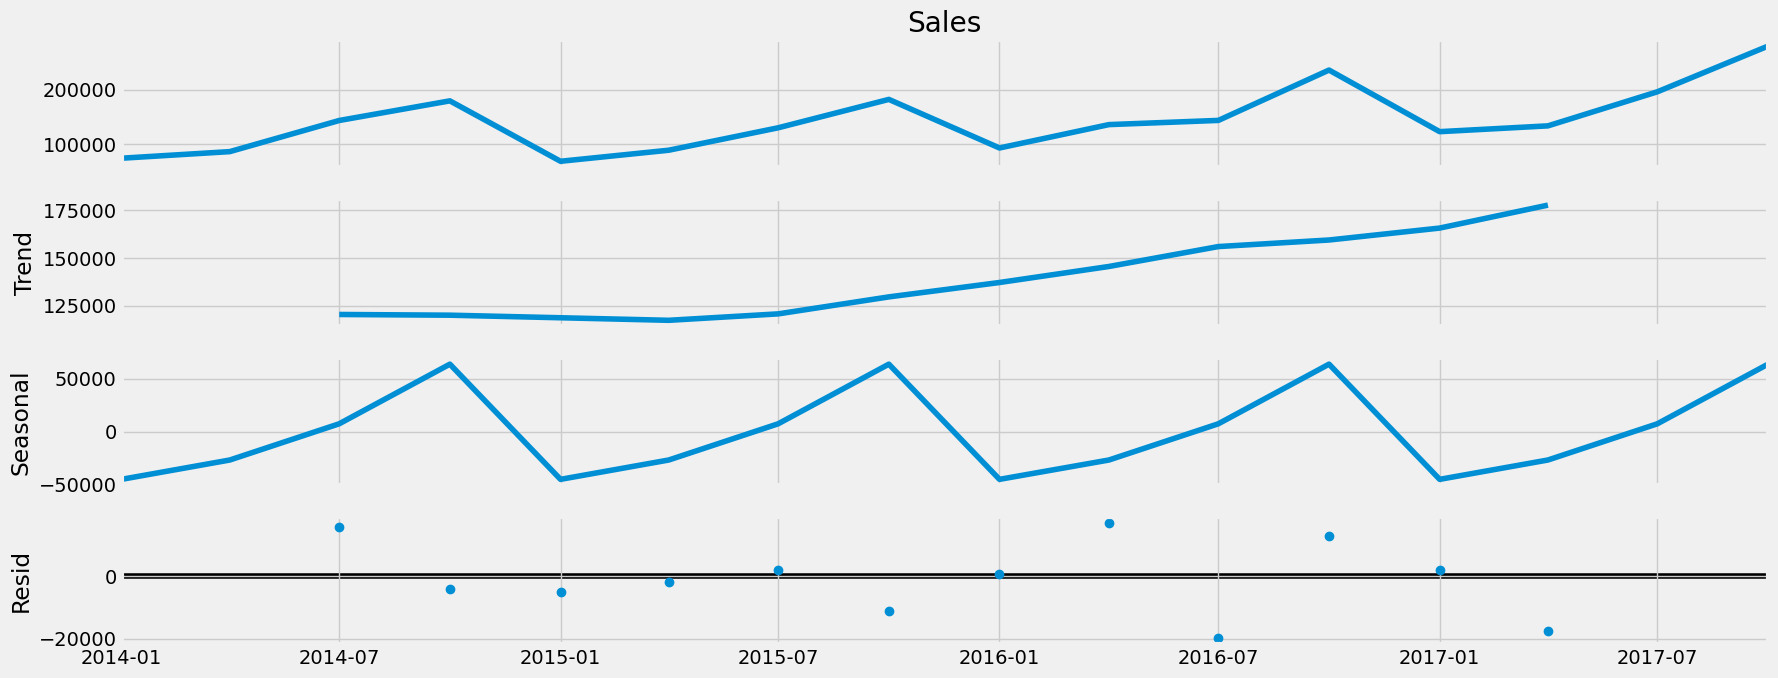

In [62]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_aggregated['Sales'], model='additive', period=4)

# Import rcParams to define the size for the plot
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

### Analysis of the Decomposition Plot


#### 1. **Trend Component:**
   - The trend component shows a steady upward movement in sales over time. This indicates that the overall sales have been increasing from 2014 to 2017, with slight variations but a clear positive trend. This suggests that the business has been growing consistently during this period.

#### 2. **Seasonal Component:**
   - The seasonal component reveals repeating patterns within each year, which are consistent with the nature of quarterly data. The pattern shows that certain quarters (likely Q4) have consistently higher sales, while others (possibly Q1 or Q2) have lower sales. This could be due to seasonal factors such as holidays, end-of-year sales, or other events that drive higher sales in specific quarters.

#### 3. **Residual Component:**
   - The residual component represents the irregular variations in the data after accounting for the trend and seasonal patterns. The residuals appear to be relatively small and close to zero, with a few outliers. This suggests that most of the variability in the sales data can be explained by the trend and seasonal components, with minimal unexplained random fluctuations.

### Insights:
- The positive trend indicates a growing business, which is a good sign for stakeholders.
- The seasonal pattern is crucial for planning marketing campaigns, inventory, and resource allocation to take advantage of high-sales quarters.
- The small residuals imply that the model fits the data well, and most of the variability is captured by the trend and seasonality, making the forecast based on this decomposition potentially reliable.


## Testing for stationarity

In [64]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the Dickey-Fuller test to the 'Sales' data
dickey_fuller(df_aggregated['Sales'])

Dickey-Fuller Stationarity Test:
Test Statistic                -1.222740
p-value                        0.663738
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


### Dickey-Fuller Test Interpretation


#### Null Hypothesis (H0):
The null hypothesis for the Dickey-Fuller test states that the time series is non-stationary (i.e., it has a unit root).

#### Interpretation:
- **p-value:** The p-value is 0.663738, which is significantly higher than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis. This suggests that the time series is non-stationary.
- **Test Statistic vs. Critical Values:** The test statistic (-1.222740) is higher than all the critical values at the 1%, 5%, and 10% significance levels. This further supports the conclusion that the time series is non-stationary.

In conclusion, based on the Dickey-Fuller test, there is insufficient evidence to reject the null hypothesis, indicating that the sales data is non-stationary. This means that the series may have trends, seasonality, or other patterns that make it non-stationary, which could require further transformation or differencing to achieve stationarity before applying certain time series models.

In [65]:
# Perform differencing on the sales data
df_aggregated_diff = df_aggregated.diff().dropna()

# Conduct the Dickey-Fuller test again on the differenced data
dickey_fuller(df_aggregated_diff['Sales'])


Dickey-Fuller Stationarity Test:
Test Statistic                -1.075894e+01
p-value                        2.550140e-19
Number of Lags Used            2.000000e+00
Number of Observations Used    1.200000e+01
Critical Value (1%)           -4.137829e+00
Critical Value (5%)           -3.154972e+00
Critical Value (10%)          -2.714477e+00
dtype: float64


### Interpretation:

- The **Test Statistic** is much lower (more negative) than the critical values at the 1%, 5%, and 10% levels. 
- The **p-value** is significantly below the standard alpha level of 0.05.

Since the test statistic is less than all the critical values and the p-value is much smaller than 0.05, we can **reject the null hypothesis**. This indicates that the differenced data is stationary.

This means that the time series data is now ready for further time series modeling and analysis, as it no longer exhibits trends or seasonality that could bias the results.

## Checking for autocorrelation

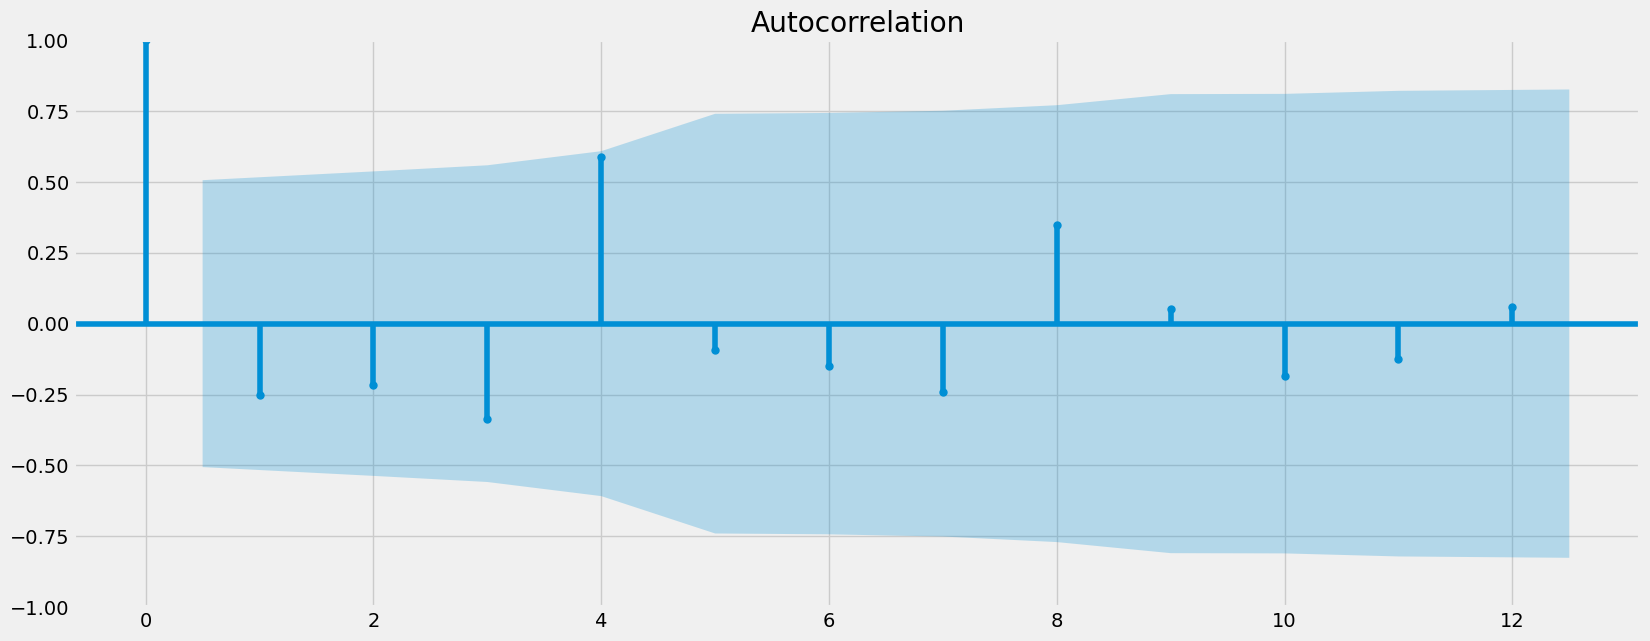

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation Function (ACF) for the differenced data
plot_acf(df_aggregated_diff)  
plt.show()


**Interpretation:**

- The autocorrelation plot indicates that the data after differencing has minimal autocorrelation, meaning that the series has been largely stationarized.
- The presence of any significant autocorrelation spikes would suggest that there are still patterns or trends in the data that haven't been accounted for, but in this case, those are minimal after differencing.
- Given the overall pattern, further differencing may not be necessary unless you aim for an even stricter level of stationarity.

In summary, the autocorrelation check suggests that the differenced data is sufficiently stationary and ready for further time series modeling or forecasting.